# LinearRegression mnodeli model kurulup çalıştırılması.

In [9]:
# Gerekli modellerim import edilmesi.
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Veri setini yükleyin
train_path = r'C:\Users\realb\Desktop\aşırı kilo modeli/train.csv'
train_data = pd.read_csv(train_path)

# Sayısal olmayan değerleri sayısal değerlere dönüştürün veya atlayın
for column in train_data.columns:
    train_data[column] = pd.to_numeric(train_data[column], errors='coerce')

# Eksik değerleri doldurun
train_data.fillna(train_data.mean(), inplace=True)

# Özellikleri ve hedef değişkeni belirleyin
X_train = train_data.drop(columns=['Death-By-High-BMI', 'Country', 'Code'])
y_train = train_data['Death-By-High-BMI']

# Modeli oluşturun ve eğitin
model = LinearRegression()
model.fit(X_train, y_train)

# Tahminler yapın
y_pred = model.predict(X_train)

# Modeli değerlendirin
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')
print(f'MAE: {mae}')

MSE: 164306386430.04846
R²: 0.549407291745009
MAE: 294561.9211675652


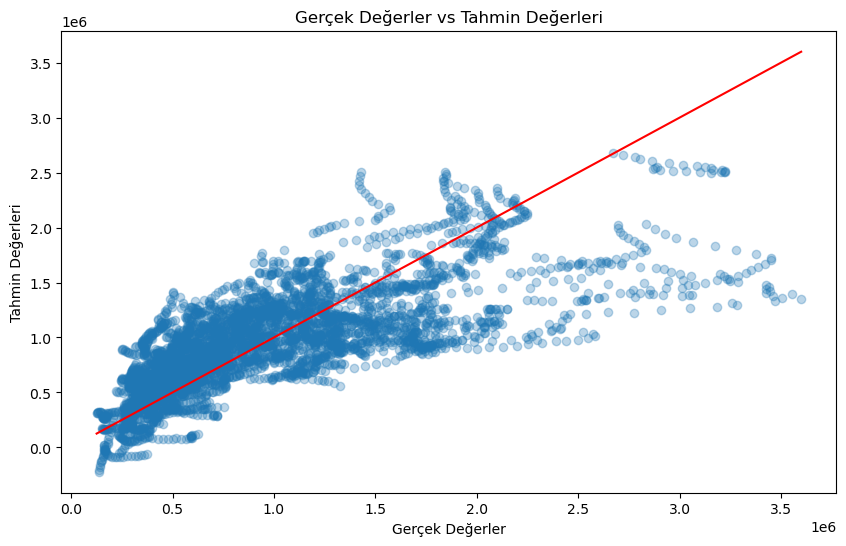

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred, alpha=0.3)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')
plt.title('Gerçek Değerler vs Tahmin Değerleri')
plt.show()


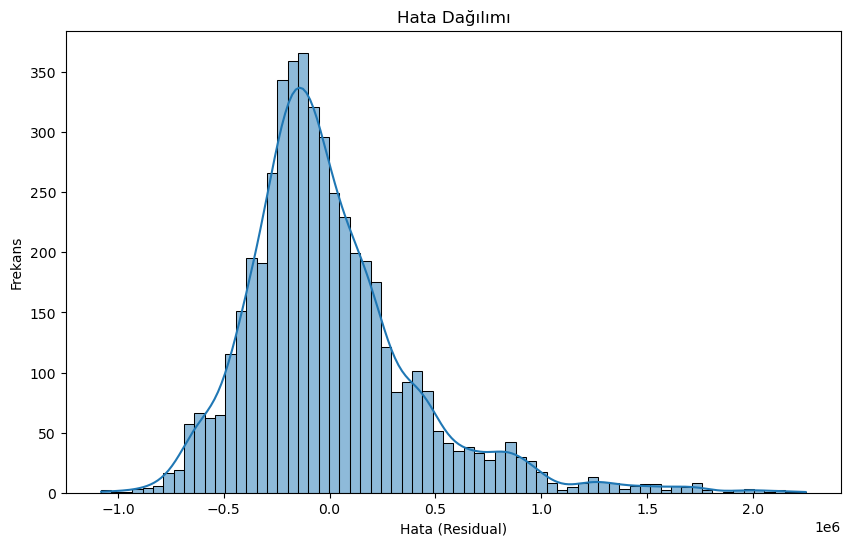

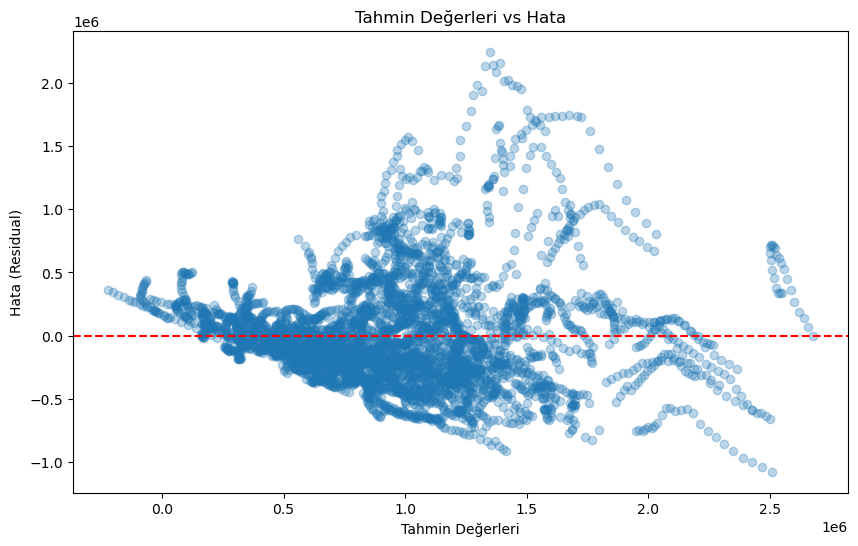

In [8]:
residuals = y_train - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Hata (Residual)')
plt.ylabel('Frekans')
plt.title('Hata Dağılımı')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Tahmin Değerleri')
plt.ylabel('Hata (Residual)')
plt.title('Tahmin Değerleri vs Hata')
plt.show()
